In [11]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math
import plotly.graph_objects as go
from collections import OrderedDict
from matplotlib.lines import Line2D  # Import for creating custom legend markers
import json
import copy
import random
import re
import seaborn as sns
import importlib


# Import BW25 packages
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA

In [326]:
from  standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc


importlib.reload(MC)

importlib.reload(lc)

Folder name Results created


<module 'life_cycle_assessment' from 'c:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\life_cycle_assessment.py'>

In [279]:
save_dir = results_folder('Results')

file_name = r'Results\Ananas - CONSQ.xlsx'
file_cont_name = r'Results\Ananas contribution - CONSQ.xlsx'
sheet_name = 'Ananas'

path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

# Your name variable should be the name of the project.
database_project = "RA - Ofir & Stine 1"
database_name = "Ananas consq"

flows = ['alubox - CONSQ', 'PP sheet sc2 - CONSQ', 'PP sheet sc3 - CONSQ']
flow_legend = ['alubox - CONSQ sc1', 'PP sheet sc2 - CONSQ', 'PP sheet sc3 - CONSQ']


Folder name Results created


In [207]:
FU, FU_proc, impact_category, plot_x_axis, sub_product_details = lc.LCA_initialization(database_project, database_name, flows)
impat =  impact_category


if f'{path}\{sheet_name}' is False:
    # Caculating the LCA results
    df = lc.life_cycle_impact_assessment(flows, FU, impat, FU_proc)
    lc.save_LCA_results(df, file_name, sheet_name, impat)


df_test = lc.import_LCA_results(file_name, flows, impat)

Biosphere database already present!!! No setup is needed
Initialization is completed


In [ ]:
# # Processing the LCA results
sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
FU_sub, FU_sub_proc, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, 'df_idx_ofir')
flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_proc)
# functional_unit_sub_new = lc.process_update(FU, functional_unit_sub)
# functional_unit_sub_new
functional_unit_sub

In [328]:
fu_sub_updated = lc.process_update(FU, functional_unit_sub)
# functional_unit_sub_new[1]


In [275]:
df_cont = lc.LCIA_contribution(impat, flow_count, FU_sub_proc, fu_sub_updated, amount, idx)

Processing flow: alubox raw materials - CONSQ in impact category: acidification
'market for aluminium, wrought alloy' (kilogram, GLO, None) Calculation 1 of 2464, Score: 0.0009462506502292941 acidification
'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None) Calculation 2 of 2464, Score: 4.8342486733289286e-05 acidification
row : 0, col : 0 is assigned list : [["'market for aluminium, wrought alloy' (kilogram, GLO, None)", 0.0009462506502292941], ["'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None)", 4.8342486733289286e-05]]
Processing flow: alubox production - CONSQ in impact category: acidification
'anodising, aluminium sheet' (square meter, RER, None) Calculation 3 of 2464, Score: 3.220412209720347e-05 acidification
'impact extrusion of aluminium, 4 strokes' (kilogram, RER, None) Calculation 4 of 2464, Score: 2.6803678273025643e-05 acidification
'corrugated board box production' (kilogram, RER, None) Calculation 5 of 2464, Score: 9.5840180

In [280]:
lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impat)

DataFrame with nested lists written to Excel successfully.


In [290]:
df_c = lc.import_LCA_results(file_cont_name, idx, impact_category)

In [291]:
df_tot, df_scaled  = lc.dataframe_element_scaling(df_test)
plt_leg = lc.dataframe_column_structure(impat)
# df_scaled

In [327]:
df_tot, df_scaled, df_cols = lc.dataframe_element_scaling(df_test)
index_list = list(df_scaled.index.values)
plt_leg = lc.dataframe_column_structure(impat)

In [294]:
df_GWP = df_test[df_test.columns[1]].to_frame()
df_GWP

,EF v3.1 EN15804
,climate change
,global warming potential (GWP100)
alubox - CONSQ,"[[alubox raw materials - CONSQ, 0.154243928228..."
PP sheet sc2 - CONSQ,"[[pp production - CONSQ, 0.22940403947612345],..."
PP sheet sc3 - CONSQ,"[[pp production - CONSQ, 0.22940403947612345],..."


In [295]:
x_axis = []
GWP_value = []

# gwp_tot = [0] * len(df_updated)
for df_size in range(len(df_GWP)):
    lst_x = []
    lst_GWP = []
    gwp_tot = 0
    for key in df_GWP.keys():
        for lst_size in range(len(df_GWP[key][df_size])):
            #print(df_size, lst_size)
            x = df_GWP[key][df_size][lst_size][0]
            gwp = df_GWP[key][df_size][lst_size][1]
            
            #print(gwp,x)
            if '- CONSQ' in x:
                #print(key)
                x = x.replace(f' - CONSQ', '')
            if 'alubox' in x:           
                x = x.replace('alubox ', '')
                if 'raw' in x:
                    x = x.replace('raw materials', 'Raw mat.')
                if 'production' in x:
                    x = 'Production'
            if 'Waste' in x:
                x = 'Incineration'
            if 'market for electricity' in x:
                x = 'Avoided electricity'
            if 'heating' in x:
                x = 'Avoided heat'
            if 'market for polypropylene' in x:
                x = 'PP granulate'
            if 'PE granulate' in x:
                x = 'PE granulate'
            if 'no Energy Recovery' in x:
                x = x.replace(' no Energy Recovery', '')
            if 'board box' in x:
                x = 'Cardboard box'
            if 'packaging film' in x:
                x = 'PE packaging film prod.'
            if 'pp' in x:
                x = x.replace('pp', 'PP')
            if 'autoclave' in x:
                x = x.replace('autoclave', 'Autoclave')
            if 'transport' in x:
                x = 'Transport'

            lst_x.append(x)
            lst_GWP.append(gwp)
            gwp_tot += gwp
    
    lst_GWP.append(gwp_tot)
    lst_x.append('Total')
    x_axis.append(lst_x)
    GWP_value.append(lst_GWP)



C:\Users\ruw\AppData\Local\Temp\7\ipykernel_9260\349218918.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for lst_size in range(len(df_GWP[key][df_size])):
C:\Users\ruw\AppData\Local\Temp\7\ipykernel_9260\349218918.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = df_GWP[key][df_size][lst_size][0]
C:\Users\ruw\AppData\Local\Temp\7\ipykernel_9260\349218918.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gwp = df_GWP

In [323]:
# Categories definitions
categories = ["Raw mat. + prod.", "Use", "Transport", "EoL", "Total"]
category_mapping = {
    "Raw mat. + prod.": ["PP production", "Cardboard box", "Scalpel", "Raw mat.", "Production"],
    "Use": ["Autoclave", "disinfection", "Handwash", "Remanufacturing"],
    "Transport": ["Transport"],
    "EoL": ["Incineration", "Avoided heat", "Avoided electricity", "EoL melting", "EoL mixed sorting"],
    "Total": ["Total"]
}

# Ensure the legend displays items in the category order
ordered_legend = {key: [] for key in category_mapping}

for x_lst in range(len(x_axis)):
    for x in range(len(x_axis[x_lst])):
        
        for key, item in category_mapping.items():
                # print(x_axis[x_lst][x], item, x_axis[x_lst][x] in item)
                if x_axis[x_lst][x] in item:
                    # print(x_axis[x_lst][x], item, x_lst, x)
                    ordered_legend[key].append(x_axis[x_lst][x])

plot_legend = {key: [] for key in category_mapping}
temp = []

for key,value in ordered_legend.items():
    #print(key, value)
    for val in value:
        if val not in temp:
            temp.append(val)
            # print(val)
            plot_legend[key].append(val)


colors = plot_colors(temp,'turbo')


In [303]:
columns_to_plot = df_scaled.columns

In [108]:
plt_leg = lc.dataframe_column_structure(impact_category)
plt_leg

['Acidification',
 'Climate Change',
 'Ecotoxicity: Freshwater',
 'Energy Resources: Non-Renewable',
 'Eutrophication: Freshwater',
 'Eutrophication: Marine',
 'Eutrophication: Terrestrial',
 'Human Toxicity: Carcinogenic',
 'Human Toxicity: Non-Carcinogenic',
 'Ionising Radiation: Human Health',
 'Land Use',
 'Material Resources: Metals/Minerals',
 'Ozone Depletion',
 'Particulate Matter Formation',
 'Photochemical Oxidant Formation',
 'Water Use']

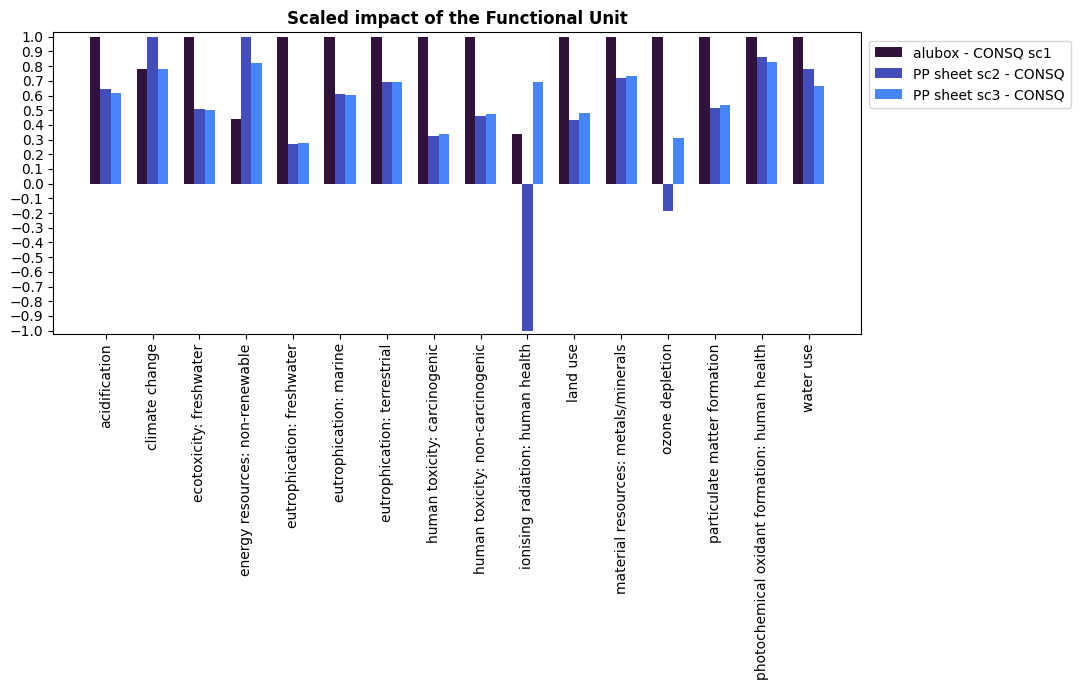

In [305]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_scaled)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))

# Plotting each group of bars
for i, process in enumerate(df_scaled.index):
    values = df_scaled.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width), values, bar_width, label=process, color=colors[i])    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(-1, 1.01, step=0.1))
plt.ylim(-1.02,1.03)

ax.legend(flow_legend,bbox_to_anchor=(1.01, .75, .25, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [314]:
directory = 'C:\\Users\\ruw\\Desktop\\RA\\'
file = f'{directory}Single-use-vs-multi-use-in-health-care\\Norm + Weigh.xlsx'

In [387]:
def LCA_normalization(directory, df):
    file = f'{directory}Single-use-vs-multi-use-in-health-care\\Norm + Weigh.xlsx'
    data_NW = pd.read_excel(file)
    columns = df.columns

    norm_lst = data_NW['Normalization']
    weigh_lst = data_NW['Weighting'].to_list

    norm_lst = [0]*(len(data_NW['Normalization']))
    weigh_lst = [0]*(len(data_NW['Weighting']))

    for i in range(len(data_NW['Normalization'])):
        norm_lst[i] = data_NW['Normalization'][i]
        weigh_lst[i] = data_NW['Weighting'][i]

    # norm_df = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
    weigh_df = pd.DataFrame().reindex_like(df)

    counter = 0
    for i in columns:
        # for j in range(len(df[columns[0]])):
        for j, row in df.iterrows():
            # norm_df[i][j] = df[i][j] * norm_lst[counter]
            # weigh_df[i][j] = df[i][j] * norm_lst[counter]* weigh_lst[counter]
            weigh_df.loc[j,i] = row[i] * norm_lst[counter]* weigh_lst[counter]
        counter +=1

    lst = [0] * len(weigh_df[columns[0]])
    for idx_val, row in weigh_df.iterrows():
    # for j in range(len(weigh_df[columns[0]])):
        temp = 0
        for i in columns:
            temp += row[i]
            print( row[i])    
        lst.append(temp)

    lst_norm_weighted = [0] * len(lst)
    lst_max = max(lst)


    for n in range(len(lst)):
        if lst_max == 0:
            # print(lst[n])
            pass
        else:
            lst_norm_weighted[n] = lst[n]/lst_max

    return lst_norm_weighted

In [388]:
lst_scaled = LCA_normalization(directory, df_tot)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


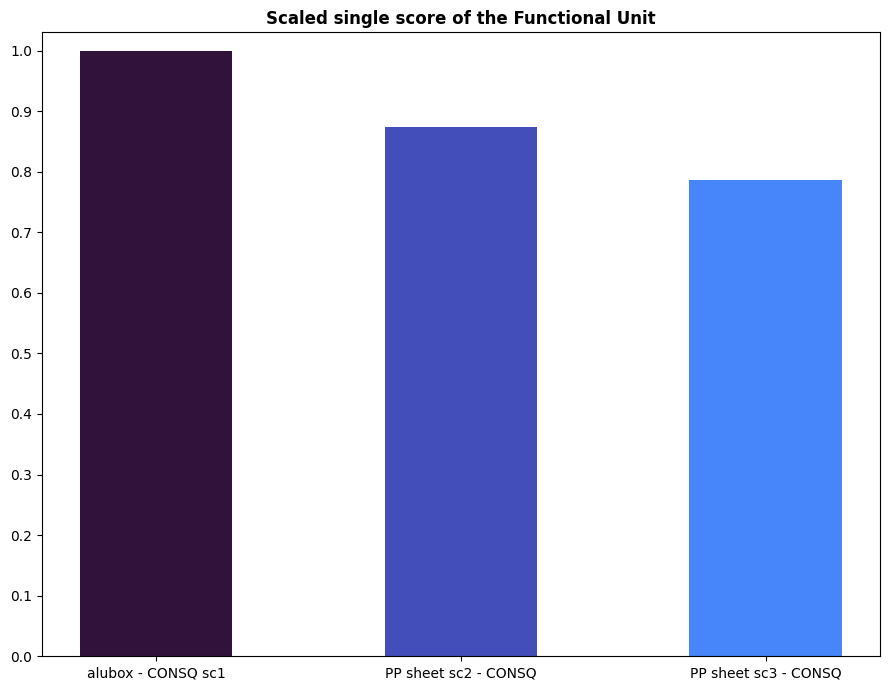

In [329]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_scaled)
bar_width = 1/(len(index_list)-5) 
index = np.arange(len(index_list))   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(flow_legend)
#plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [331]:
# # Categories definitions
# categories = ["Raw mat. + prod.", "Use", "Transport", "EoL", "Total"]
# category_mapping = {
#     "Raw mat. + prod.": ["Diathermy", "Bipolar burner", "Scalpel"],
#     "Use": ["Autoclave", "Dishwasher", "Erbe", "Remanufacturing"],
#     "Transport": ["Transport"],
#     "EoL": ["Incineration", "Avoided heat", "Avoided electricity"],
#     "Total": ["Total"]
# }

# Ensure the legend displays items in the category order
ordered_legend = {key: [] for key in category_mapping}

for x_lst in range(len(x_axis)):
    for x in range(len(x_axis[x_lst])):
        
        for key, item in category_mapping.items():
                #print(x_axis[x_lst][x], item, x_axis[x_lst][x] in item)
                if x_axis[x_lst][x] in item:
                    # print(x_axis[x_lst][x], item, x_lst, x)
                    ordered_legend[key].append(x_axis[x_lst][x])

plot_legend = {key: [] for key in category_mapping}
temp = []

for key,value in ordered_legend.items():
    #print(key, value)
    for val in value:
        if val not in temp:
            temp.append(val)
            # print(val)
            plot_legend[key].append(val)



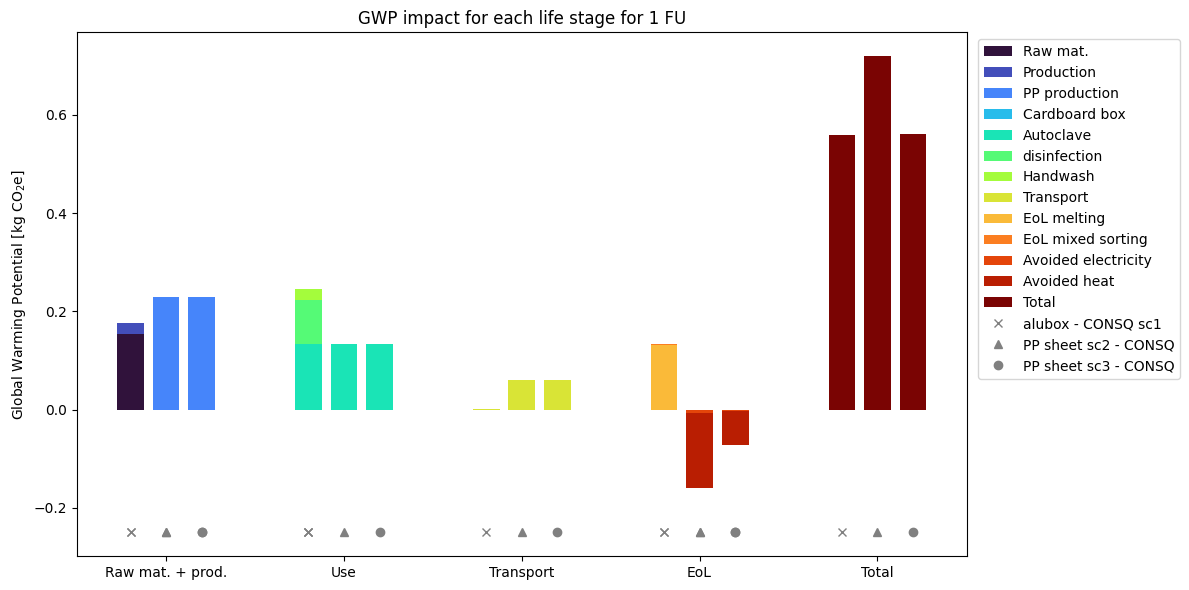

In [330]:

color_map = {}
#unique_processes = {process for sublist in x_axis for process in sublist}
for i, process in enumerate(temp):
    color_map[process] = colors[i]
    #print(process, i)



# Initialize an ordered dictionary for legend_handles to maintain the order
legend_handles = OrderedDict()

# Initialize legend_handles with keys from plot_legend and empty lists
for process in temp:
    legend_handles[process] = None

# Plotting logic
if len(x_axis) == len(GWP_value):
    num_scenarios = len(GWP_value)  # Number of scenarios
    bar_width = 0.15  # Width of the bars for each scenario
    space_between_scenarios = 0.05  # Space between each scenario set
    index = np.arange(len(categories))  # X-axis index positions for the categories

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    idx = ['x', '^', 'o']  # List of markers for scenarios
    all_markers = []  # List to store Line2D objects for markers

    # Main plotting logic
    for scenario in range(num_scenarios):
        bottom_positive = np.zeros(len(categories))  # Initialize the bottom array for positive values
        bottom_negative = np.zeros(len(categories))  # Initialize the bottom array for negative values
        scenario_index = index + scenario * (bar_width + space_between_scenarios)

        for length in range(len(x_axis[scenario])):
            process_name = x_axis[scenario][length]
            value = GWP_value[scenario][length]

            # Determine which category this process falls into
            for i, category in enumerate(categories):
                if any(keyword in process_name for keyword in category_mapping[category]):
                    # Assign color based on the process name
                    color = color_map[process_name]

                    # Create a bar with the specific color
                    if value >= 0:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_positive[i],
                                    color=color)
                        bottom_positive[i] += value
                    else:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_negative[i],
                                    color=color)
                        bottom_negative[i] += value

                    # Add the bar to the corresponding process in legend_handles
                    if legend_handles[process_name] is None:
                        legend_handles[process_name] = bar

                    # Add plot markers (symbols) at the bottom
                    ax.plot(scenario_index[i], -0.25, marker=idx[scenario], color='gray')

                    break

    # Add custom markers to the legend
    for i, marker in enumerate(idx):
        all_markers.append(Line2D([0], [0], marker=marker, color='gray', label=f'Scenario {i + 1}', linestyle='None'))

    # Set x-axis labels and ticks, adjusting to account for spacing
    tick_positions = index + (num_scenarios - 1) * (bar_width + space_between_scenarios) / 2
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(categories)

    # Axis limits
    # ax.set_ylim(-.45, 3.55)
    # ax.set_yticks(np.arange(-0.5, 3.6, step=0.25))
    ax.set_ylabel("Global Warming Potential [kg CO$_2$e]")
    ax.set_title('GWP impact for each life stage for 1 FU')

    # Add markers to legend_handles for display at the bottom of the legend
    valid_legend_handles = [(k, v) for k, v in legend_handles.items() if v is not None]
    legend_handles_for_display = valid_legend_handles + [(flow_legend[i], marker) for i, marker in enumerate(all_markers)]

    if legend_handles_for_display:
        ax.legend(handles=[v for k, v in legend_handles_for_display], labels=[k for k, v in legend_handles_for_display], bbox_to_anchor=(1.005, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(os.path.join(save_dir, f'LC_impact_ofir_APOS.jpg'), bbox_inches='tight')
    plt.show()
    

else:
    print('The x-axis and GWP values have different sizes')
